In [32]:
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

from math import sqrt
from numpy import concatenate
from sklearn.metrics import mean_squared_error

#DiscriminantAnalysis
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA

#SVMs
#from sklearn.l import LSTM
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV
from mpl_toolkits import mplot3d
from sklearn.dummy import DummyClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import(average_precision_score)
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler, MaxAbsScaler
# minMax_scale = MaxAbsScaler()   # to default range [0, 1]
# train = minMax_scale.fit_transform(train)
# test = minMax_scale.fit_transform(test)

In [34]:
from pandas import concat

# convert series to supervised learning by Jason Brownlee 
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    """
    Frame a time series as a supervised learning dataset.
    Arguments:
        data: Sequence of observations as a list or NumPy array.
        n_in: Number of lag observations as input (X).
        n_out: Number of observations as output (y).
        dropnan: Boolean whether or not to drop rows with NaN values.
    Returns:
        Pandas DataFrame of series framed for supervised learning.
    """
    
    n_vars = 1 if type(data) is list else data.shape[1]
    df = pd.DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    # put it all together
    agg = concat(cols, axis=1)
    agg.columns = names
    #drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
MSFT
252
Epoch 1/50
14/14 - 1s - loss: 0.2918 - val_loss: 0.9008 - 1s/epoch - 83ms/step
Epoch 2/50
14/14 - 0s - loss: 0.1847 - val_loss: 0.6370 - 40ms/epoch - 3ms/step
Epoch 3/50
14/14 - 0s - loss: 0.1122 - val_loss: 0.3976 - 39ms/epoch - 3ms/step
Epoch 4/50
14/14 - 0s - loss: 0.0901 - val_loss: 0.2296 - 38ms/epoch - 3ms/step
Epoch 5/50
14/14 - 0s - loss: 0.0809 - val_loss: 0.1287 - 37ms/epoch - 3ms/step
Epoch 6/50
14/14 - 0s - loss: 0.0655 - val_loss: 0.0636 - 36ms/epoch - 3ms/step
Epoch 7/50
14/14 - 0s - loss: 0.0450 - val_loss: 0.0187 - 37ms/epoch - 3ms/step
Epoch 8/50
14/14 - 0s - loss: 0.0268 - val_loss: 0.0477 - 36ms/epoch - 3ms/step
Epoch 9/50
14/14 - 0s - loss: 0.0211 - val_loss: 0.0898 - 37ms/epoch - 3ms/s

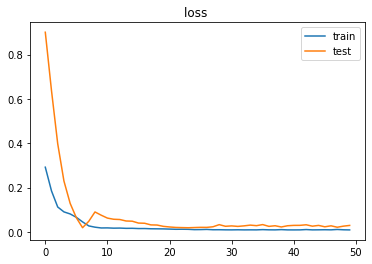

Test RMSE: 7.037


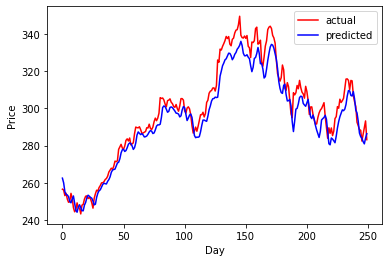

249
249


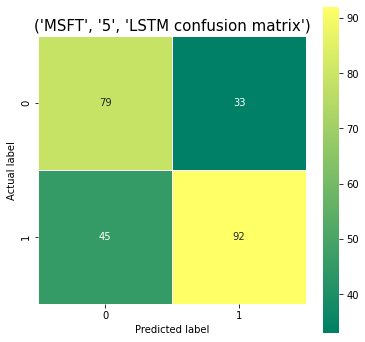

The accuracy of the model is: 68.67 %
The f1 value for the model is: 70.23 %
504
Epoch 1/50
28/28 - 1s - loss: 0.1248 - val_loss: 0.6500 - 1s/epoch - 40ms/step
Epoch 2/50
28/28 - 0s - loss: 0.1043 - val_loss: 0.3826 - 60ms/epoch - 2ms/step
Epoch 3/50
28/28 - 0s - loss: 0.0708 - val_loss: 0.1036 - 56ms/epoch - 2ms/step
Epoch 4/50
28/28 - 0s - loss: 0.0372 - val_loss: 0.1059 - 56ms/epoch - 2ms/step
Epoch 5/50
28/28 - 0s - loss: 0.0079 - val_loss: 0.0320 - 56ms/epoch - 2ms/step
Epoch 6/50
28/28 - 0s - loss: 0.0139 - val_loss: 0.0243 - 56ms/epoch - 2ms/step
Epoch 7/50
28/28 - 0s - loss: 0.0228 - val_loss: 0.0338 - 56ms/epoch - 2ms/step
Epoch 8/50
28/28 - 0s - loss: 0.0303 - val_loss: 0.0493 - 55ms/epoch - 2ms/step
Epoch 9/50
28/28 - 0s - loss: 0.0119 - val_loss: 0.0323 - 55ms/epoch - 2ms/step
Epoch 10/50
28/28 - 0s - loss: 0.0066 - val_loss: 0.0357 - 57ms/epoch - 2ms/step
Epoch 11/50
28/28 - 0s - loss: 0.0167 - val_loss: 0.0375 - 55ms/epoch - 2ms/step
Epoch 12/50
28/28 - 0s - loss: 0.0158 

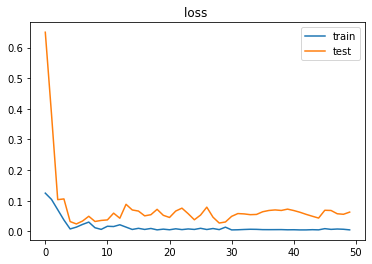

Test RMSE: 12.933


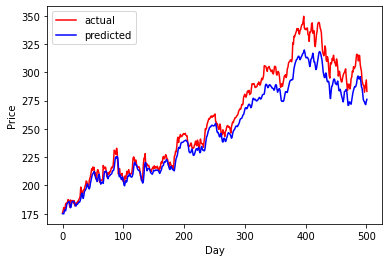

501
501


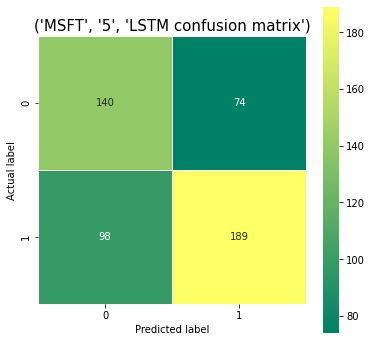

The accuracy of the model is: 65.67 %
The f1 value for the model is: 68.73 %
756
Epoch 1/50
42/42 - 1s - loss: 0.0358 - val_loss: 0.1407 - 1s/epoch - 27ms/step
Epoch 2/50
42/42 - 0s - loss: 0.1117 - val_loss: 0.2070 - 79ms/epoch - 2ms/step
Epoch 3/50
42/42 - 0s - loss: 0.0468 - val_loss: 0.0420 - 77ms/epoch - 2ms/step
Epoch 4/50
42/42 - 0s - loss: 0.0075 - val_loss: 0.0760 - 76ms/epoch - 2ms/step
Epoch 5/50
42/42 - 0s - loss: 0.0278 - val_loss: 0.1118 - 76ms/epoch - 2ms/step
Epoch 6/50
42/42 - 0s - loss: 0.0191 - val_loss: 0.1305 - 75ms/epoch - 2ms/step
Epoch 7/50
42/42 - 0s - loss: 0.0240 - val_loss: 0.1305 - 76ms/epoch - 2ms/step
Epoch 8/50
42/42 - 0s - loss: 0.0128 - val_loss: 0.0910 - 75ms/epoch - 2ms/step
Epoch 9/50
42/42 - 0s - loss: 0.0134 - val_loss: 0.0841 - 75ms/epoch - 2ms/step
Epoch 10/50
42/42 - 0s - loss: 0.0087 - val_loss: 0.0976 - 76ms/epoch - 2ms/step
Epoch 11/50
42/42 - 0s - loss: 0.0076 - val_loss: 0.1104 - 76ms/epoch - 2ms/step
Epoch 12/50
42/42 - 0s - loss: 0.0116 

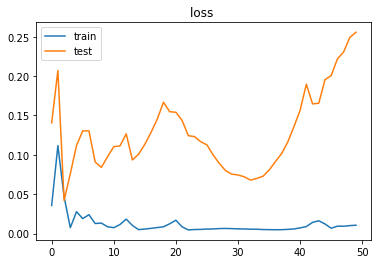

Test RMSE: 37.463


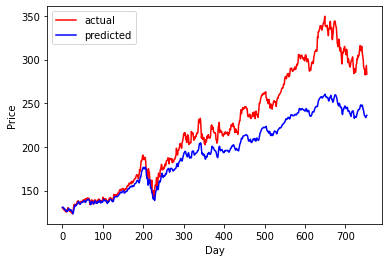

753
753


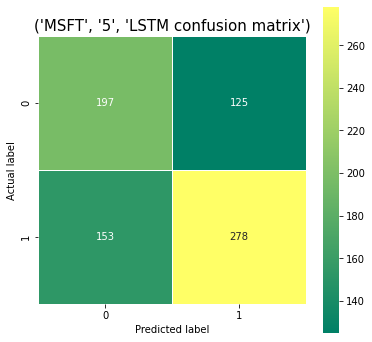

The accuracy of the model is: 63.08 %
The f1 value for the model is: 66.67 %
1007
Epoch 1/50
56/56 - 1s - loss: 0.0794 - val_loss: 0.7239 - 1s/epoch - 20ms/step
Epoch 2/50
56/56 - 0s - loss: 0.0790 - val_loss: 0.2063 - 100ms/epoch - 2ms/step
Epoch 3/50
56/56 - 0s - loss: 0.0386 - val_loss: 0.0926 - 96ms/epoch - 2ms/step
Epoch 4/50
56/56 - 0s - loss: 0.0076 - val_loss: 0.1049 - 95ms/epoch - 2ms/step
Epoch 5/50
56/56 - 0s - loss: 0.0085 - val_loss: 0.1149 - 96ms/epoch - 2ms/step
Epoch 6/50
56/56 - 0s - loss: 0.0087 - val_loss: 0.1252 - 95ms/epoch - 2ms/step
Epoch 7/50
56/56 - 0s - loss: 0.0088 - val_loss: 0.1348 - 96ms/epoch - 2ms/step
Epoch 8/50
56/56 - 0s - loss: 0.0081 - val_loss: 0.1494 - 95ms/epoch - 2ms/step
Epoch 9/50
56/56 - 0s - loss: 0.0086 - val_loss: 0.1669 - 95ms/epoch - 2ms/step
Epoch 10/50
56/56 - 0s - loss: 0.0097 - val_loss: 0.1650 - 95ms/epoch - 2ms/step
Epoch 11/50
56/56 - 0s - loss: 0.0061 - val_loss: 0.1970 - 96ms/epoch - 2ms/step
Epoch 12/50
56/56 - 0s - loss: 0.006

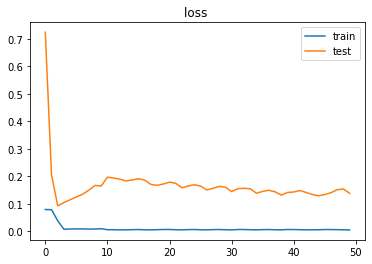

Test RMSE: 18.375


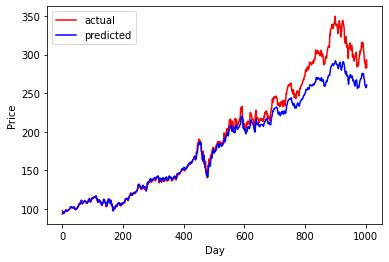

1004
1004


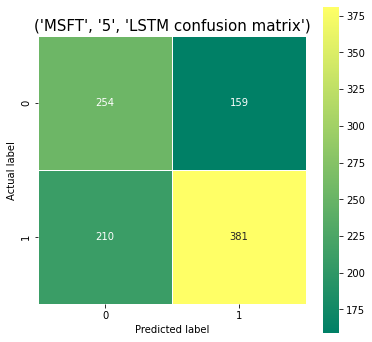

The accuracy of the model is: 63.25 %
The f1 value for the model is: 67.37 %
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
BP
252
Epoch 1/50
14/14 - 2s - loss: 0.5014 - val_loss: 0.2231 - 2s/epoch - 118ms/step
Epoch 2/50
14/14 - 0s - loss: 0.3174 - val_loss: 0.0681 - 40ms/epoch - 3ms/step
Epoch 3/50
14/14 - 0s - loss: 0.1595 - val_loss: 0.1062 - 41ms/epoch - 3ms/step
Epoch 4/50
14/14 - 0s - loss: 0.0533 - val_loss: 0.0476 - 39ms/epoch - 3ms/step
Epoch 5/50
14/14 - 0s - loss: 0.0794 - val_loss: 0.0865 - 37ms/epoch - 3ms/step
Epoch 6/50
14/14 - 0s - loss: 0.0450 - val_loss: 0.0473 - 37ms/epoch - 3ms/step
Epoch 7/50
14/14 - 0s - loss: 0.0543 - val_loss: 0.0667 - 37ms/epoch - 3ms/step
Epoch 8/50
14/14 - 0s - loss: 0.0355 - val_loss: 0.0335 - 36ms/epoch - 3ms/step


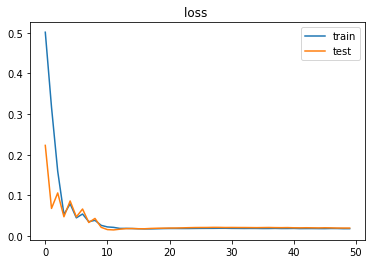

Test RMSE: 0.789


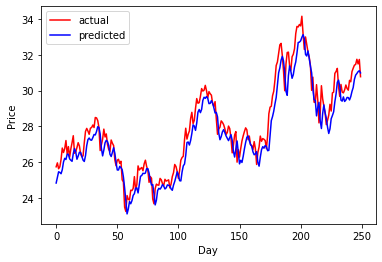

249
249


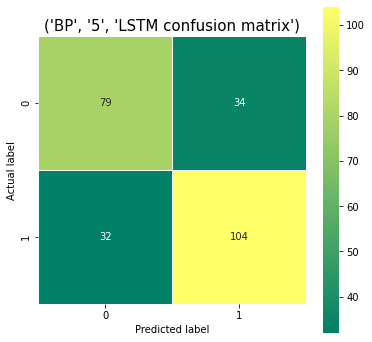

The accuracy of the model is: 73.49 %
The f1 value for the model is: 75.91 %
504
Epoch 1/50
28/28 - 1s - loss: 0.4780 - val_loss: 0.0571 - 1s/epoch - 40ms/step
Epoch 2/50
28/28 - 0s - loss: 0.1173 - val_loss: 0.1538 - 62ms/epoch - 2ms/step
Epoch 3/50
28/28 - 0s - loss: 0.0510 - val_loss: 0.1296 - 58ms/epoch - 2ms/step
Epoch 4/50
28/28 - 0s - loss: 0.0482 - val_loss: 0.1132 - 56ms/epoch - 2ms/step
Epoch 5/50
28/28 - 0s - loss: 0.0431 - val_loss: 0.1003 - 56ms/epoch - 2ms/step
Epoch 6/50
28/28 - 0s - loss: 0.0364 - val_loss: 0.0896 - 56ms/epoch - 2ms/step
Epoch 7/50
28/28 - 0s - loss: 0.0292 - val_loss: 0.0836 - 56ms/epoch - 2ms/step
Epoch 8/50
28/28 - 0s - loss: 0.0246 - val_loss: 0.0807 - 56ms/epoch - 2ms/step
Epoch 9/50
28/28 - 0s - loss: 0.0222 - val_loss: 0.0720 - 56ms/epoch - 2ms/step
Epoch 10/50
28/28 - 0s - loss: 0.0190 - val_loss: 0.0630 - 56ms/epoch - 2ms/step
Epoch 11/50
28/28 - 0s - loss: 0.0166 - val_loss: 0.0521 - 56ms/epoch - 2ms/step
Epoch 12/50
28/28 - 0s - loss: 0.0150 

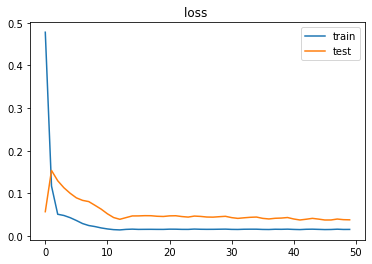

Test RMSE: 1.584


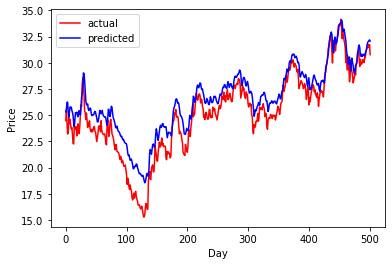

501
501


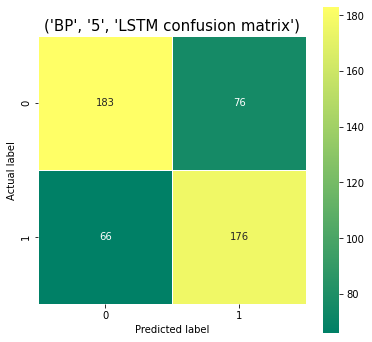

The accuracy of the model is: 71.66 %
The f1 value for the model is: 71.26 %
756
Epoch 1/50
42/42 - 1s - loss: 0.2283 - val_loss: 0.1521 - 1s/epoch - 27ms/step
Epoch 2/50
42/42 - 0s - loss: 0.0877 - val_loss: 0.0995 - 79ms/epoch - 2ms/step
Epoch 3/50
42/42 - 0s - loss: 0.0728 - val_loss: 0.0719 - 78ms/epoch - 2ms/step
Epoch 4/50
42/42 - 0s - loss: 0.0497 - val_loss: 0.0476 - 77ms/epoch - 2ms/step
Epoch 5/50
42/42 - 0s - loss: 0.0268 - val_loss: 0.0331 - 76ms/epoch - 2ms/step
Epoch 6/50
42/42 - 0s - loss: 0.0189 - val_loss: 0.0351 - 77ms/epoch - 2ms/step
Epoch 7/50
42/42 - 0s - loss: 0.0170 - val_loss: 0.0319 - 77ms/epoch - 2ms/step
Epoch 8/50
42/42 - 0s - loss: 0.0151 - val_loss: 0.0271 - 76ms/epoch - 2ms/step
Epoch 9/50
42/42 - 0s - loss: 0.0163 - val_loss: 0.0286 - 78ms/epoch - 2ms/step
Epoch 10/50
42/42 - 0s - loss: 0.0168 - val_loss: 0.0271 - 76ms/epoch - 2ms/step
Epoch 11/50
42/42 - 0s - loss: 0.0148 - val_loss: 0.0232 - 75ms/epoch - 2ms/step
Epoch 12/50
42/42 - 0s - loss: 0.0143 

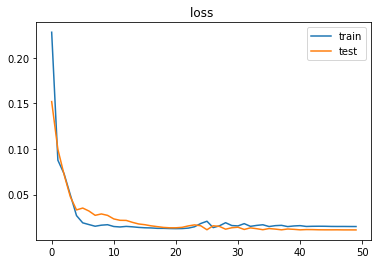

Test RMSE: 0.790


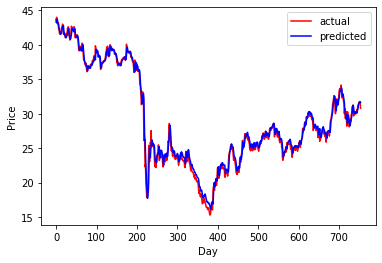

753
753


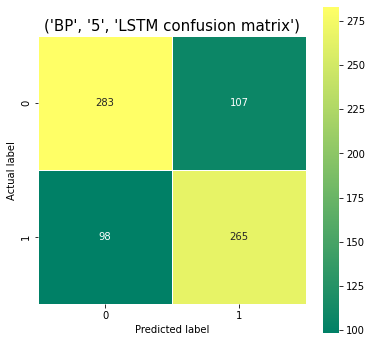

The accuracy of the model is: 72.78 %
The f1 value for the model is: 72.11 %
1007
Epoch 1/50
56/56 - 1s - loss: 0.2445 - val_loss: 0.1127 - 1s/epoch - 20ms/step
Epoch 2/50
56/56 - 0s - loss: 0.0927 - val_loss: 0.0744 - 96ms/epoch - 2ms/step
Epoch 3/50
56/56 - 0s - loss: 0.0741 - val_loss: 0.0506 - 94ms/epoch - 2ms/step
Epoch 4/50
56/56 - 0s - loss: 0.0314 - val_loss: 0.0434 - 95ms/epoch - 2ms/step
Epoch 5/50
56/56 - 0s - loss: 0.0207 - val_loss: 0.0360 - 95ms/epoch - 2ms/step
Epoch 6/50
56/56 - 0s - loss: 0.0190 - val_loss: 0.0296 - 94ms/epoch - 2ms/step
Epoch 7/50
56/56 - 0s - loss: 0.0163 - val_loss: 0.0243 - 95ms/epoch - 2ms/step
Epoch 8/50
56/56 - 0s - loss: 0.0149 - val_loss: 0.0210 - 96ms/epoch - 2ms/step
Epoch 9/50
56/56 - 0s - loss: 0.0149 - val_loss: 0.0197 - 96ms/epoch - 2ms/step
Epoch 10/50
56/56 - 0s - loss: 0.0145 - val_loss: 0.0194 - 96ms/epoch - 2ms/step
Epoch 11/50
56/56 - 0s - loss: 0.0144 - val_loss: 0.0194 - 94ms/epoch - 2ms/step
Epoch 12/50
56/56 - 0s - loss: 0.0145

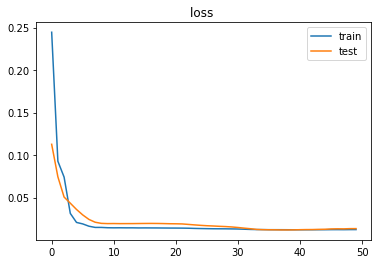

Test RMSE: 0.909


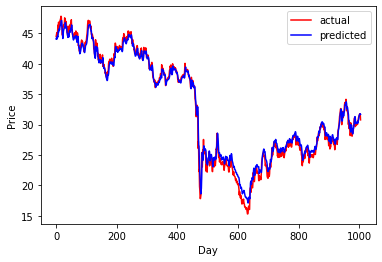

1004
1004


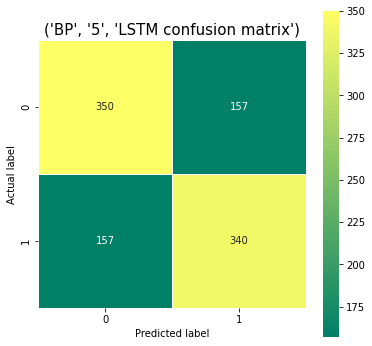

The accuracy of the model is: 68.73 %
The f1 value for the model is: 68.41 %
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
DIS
252
Epoch 1/50
14/14 - 1s - loss: 0.2325 - val_loss: 0.4188 - 1s/epoch - 77ms/step
Epoch 2/50
14/14 - 0s - loss: 0.1019 - val_loss: 0.2051 - 38ms/epoch - 3ms/step
Epoch 3/50
14/14 - 0s - loss: 0.0743 - val_loss: 0.1145 - 39ms/epoch - 3ms/step
Epoch 4/50
14/14 - 0s - loss: 0.0769 - val_loss: 0.1000 - 37ms/epoch - 3ms/step
Epoch 5/50
14/14 - 0s - loss: 0.0676 - val_loss: 0.0926 - 35ms/epoch - 3ms/step
Epoch 6/50
14/14 - 0s - loss: 0.0550 - val_loss: 0.0694 - 35ms/epoch - 3ms/step
Epoch 7/50
14/14 - 0s - loss: 0.0435 - val_loss: 0.0425 - 35ms/epoch - 3ms/step
Epoch 8/50
14/14 - 0s - loss: 0.0332 - val_loss: 0.0231 - 35ms/epoch - 3ms/step


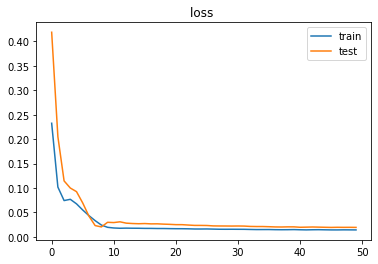

Test RMSE: 3.023


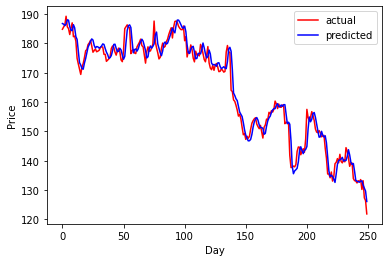

249
249


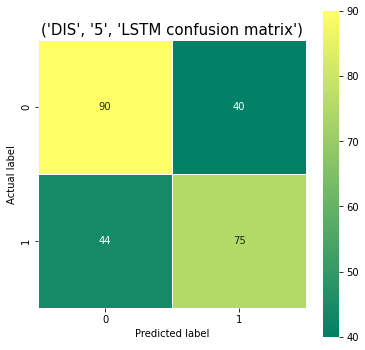

The accuracy of the model is: 66.27 %
The f1 value for the model is: 64.10 %
504
Epoch 1/50
28/28 - 1s - loss: 0.2544 - val_loss: 0.2675 - 1s/epoch - 43ms/step
Epoch 2/50
28/28 - 0s - loss: 0.0484 - val_loss: 0.0379 - 60ms/epoch - 2ms/step
Epoch 3/50
28/28 - 0s - loss: 0.0752 - val_loss: 0.0385 - 56ms/epoch - 2ms/step
Epoch 4/50
28/28 - 0s - loss: 0.0524 - val_loss: 0.0303 - 57ms/epoch - 2ms/step
Epoch 5/50
28/28 - 0s - loss: 0.0398 - val_loss: 0.0417 - 57ms/epoch - 2ms/step
Epoch 6/50
28/28 - 0s - loss: 0.0175 - val_loss: 0.0280 - 59ms/epoch - 2ms/step
Epoch 7/50
28/28 - 0s - loss: 0.0170 - val_loss: 0.0276 - 57ms/epoch - 2ms/step
Epoch 8/50
28/28 - 0s - loss: 0.0142 - val_loss: 0.0302 - 57ms/epoch - 2ms/step
Epoch 9/50
28/28 - 0s - loss: 0.0152 - val_loss: 0.0282 - 57ms/epoch - 2ms/step
Epoch 10/50
28/28 - 0s - loss: 0.0135 - val_loss: 0.0284 - 57ms/epoch - 2ms/step
Epoch 11/50
28/28 - 0s - loss: 0.0147 - val_loss: 0.0269 - 56ms/epoch - 2ms/step
Epoch 12/50
28/28 - 0s - loss: 0.0123 

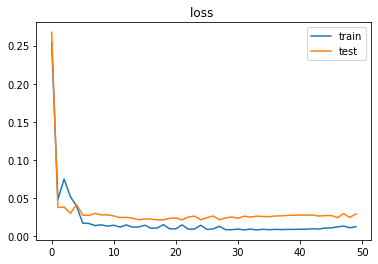

Test RMSE: 4.474


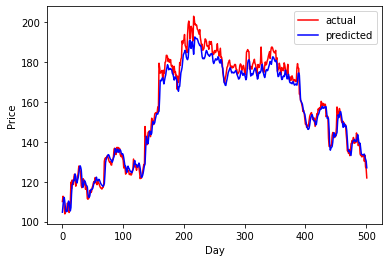

501
501


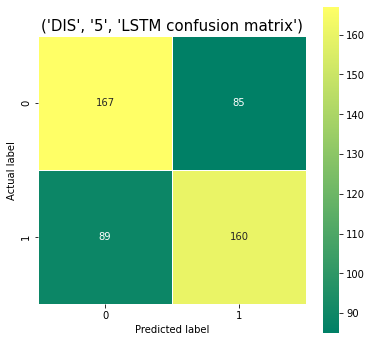

The accuracy of the model is: 65.27 %
The f1 value for the model is: 64.78 %
756
Epoch 1/50
42/42 - 1s - loss: 0.1246 - val_loss: 0.0398 - 1s/epoch - 27ms/step
Epoch 2/50
42/42 - 0s - loss: 0.1118 - val_loss: 0.0234 - 79ms/epoch - 2ms/step
Epoch 3/50
42/42 - 0s - loss: 0.0727 - val_loss: 0.0354 - 77ms/epoch - 2ms/step
Epoch 4/50
42/42 - 0s - loss: 0.0465 - val_loss: 0.0275 - 76ms/epoch - 2ms/step
Epoch 5/50
42/42 - 0s - loss: 0.0352 - val_loss: 0.0463 - 76ms/epoch - 2ms/step
Epoch 6/50
42/42 - 0s - loss: 0.0338 - val_loss: 0.0479 - 75ms/epoch - 2ms/step
Epoch 7/50
42/42 - 0s - loss: 0.0287 - val_loss: 0.0493 - 76ms/epoch - 2ms/step
Epoch 8/50
42/42 - 0s - loss: 0.0238 - val_loss: 0.0342 - 76ms/epoch - 2ms/step
Epoch 9/50
42/42 - 0s - loss: 0.0191 - val_loss: 0.0209 - 76ms/epoch - 2ms/step
Epoch 10/50
42/42 - 0s - loss: 0.0094 - val_loss: 0.0198 - 77ms/epoch - 2ms/step
Epoch 11/50
42/42 - 0s - loss: 0.0103 - val_loss: 0.0213 - 75ms/epoch - 2ms/step
Epoch 12/50
42/42 - 0s - loss: 0.0094 

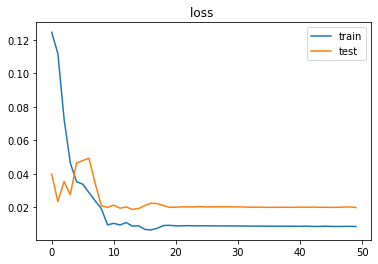

Test RMSE: 3.393


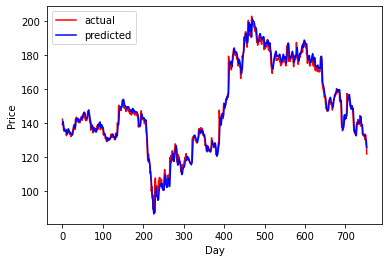

753
753


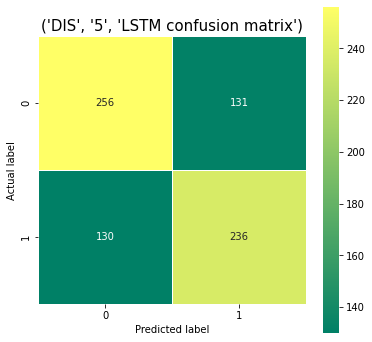

The accuracy of the model is: 65.34 %
The f1 value for the model is: 64.39 %
1007
Epoch 1/50
56/56 - 1s - loss: 0.0681 - val_loss: 0.0419 - 1s/epoch - 21ms/step
Epoch 2/50
56/56 - 0s - loss: 0.1172 - val_loss: 0.0821 - 96ms/epoch - 2ms/step
Epoch 3/50
56/56 - 0s - loss: 0.0614 - val_loss: 0.0266 - 99ms/epoch - 2ms/step
Epoch 4/50
56/56 - 0s - loss: 0.0152 - val_loss: 0.0218 - 98ms/epoch - 2ms/step
Epoch 5/50
56/56 - 0s - loss: 0.0118 - val_loss: 0.0191 - 99ms/epoch - 2ms/step
Epoch 6/50
56/56 - 0s - loss: 0.0119 - val_loss: 0.0190 - 96ms/epoch - 2ms/step
Epoch 7/50
56/56 - 0s - loss: 0.0115 - val_loss: 0.0215 - 94ms/epoch - 2ms/step
Epoch 8/50
56/56 - 0s - loss: 0.0105 - val_loss: 0.0195 - 95ms/epoch - 2ms/step
Epoch 9/50
56/56 - 0s - loss: 0.0076 - val_loss: 0.0187 - 95ms/epoch - 2ms/step
Epoch 10/50
56/56 - 0s - loss: 0.0058 - val_loss: 0.0197 - 95ms/epoch - 2ms/step
Epoch 11/50
56/56 - 0s - loss: 0.0059 - val_loss: 0.0190 - 95ms/epoch - 2ms/step
Epoch 12/50
56/56 - 0s - loss: 0.0057

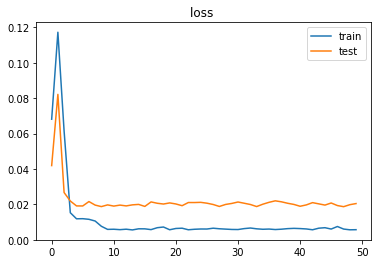

Test RMSE: 3.167


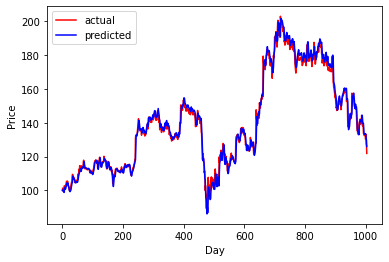

1004
1004


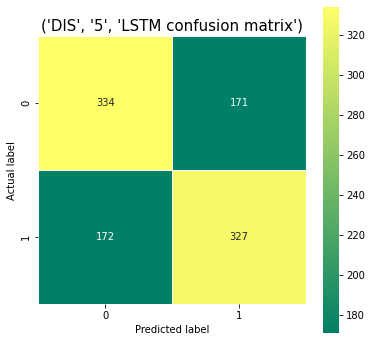

The accuracy of the model is: 65.84 %
The f1 value for the model is: 65.60 %
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
LMT
252
Epoch 1/50
14/14 - 1s - loss: 0.4483 - val_loss: 0.5433 - 1s/epoch - 77ms/step
Epoch 2/50
14/14 - 0s - loss: 0.2785 - val_loss: 0.3186 - 38ms/epoch - 3ms/step
Epoch 3/50
14/14 - 0s - loss: 0.1063 - val_loss: 0.0835 - 38ms/epoch - 3ms/step
Epoch 4/50
14/14 - 0s - loss: 0.0798 - val_loss: 0.0545 - 37ms/epoch - 3ms/step
Epoch 5/50
14/14 - 0s - loss: 0.0877 - val_loss: 0.0576 - 36ms/epoch - 3ms/step
Epoch 6/50
14/14 - 0s - loss: 0.0739 - val_loss: 0.0514 - 36ms/epoch - 3ms/step
Epoch 7/50
14/14 - 0s - loss: 0.0635 - val_loss: 0.0393 - 36ms/epoch - 3ms/step
Epoch 8/50
14/14 - 0s - loss: 0.0568 - val_loss: 0.0324 - 35ms/epoch - 3ms/step


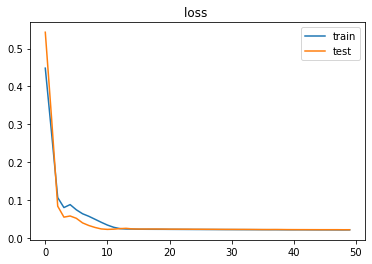

Test RMSE: 6.450


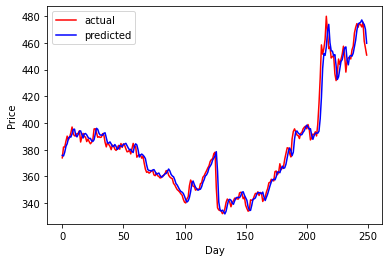

249
249


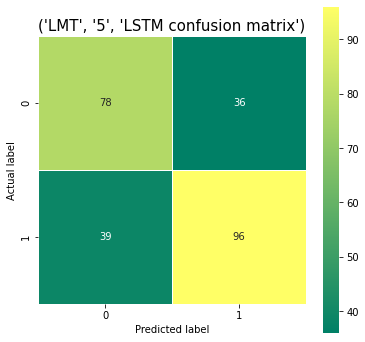

The accuracy of the model is: 69.88 %
The f1 value for the model is: 71.91 %
504
Epoch 1/50
28/28 - 1s - loss: 0.2771 - val_loss: 0.3802 - 1s/epoch - 44ms/step
Epoch 2/50
28/28 - 0s - loss: 0.0607 - val_loss: 0.0511 - 62ms/epoch - 2ms/step
Epoch 3/50
28/28 - 0s - loss: 0.1132 - val_loss: 0.0328 - 57ms/epoch - 2ms/step
Epoch 4/50
28/28 - 0s - loss: 0.0681 - val_loss: 0.0291 - 57ms/epoch - 2ms/step
Epoch 5/50
28/28 - 0s - loss: 0.0478 - val_loss: 0.0242 - 57ms/epoch - 2ms/step
Epoch 6/50
28/28 - 0s - loss: 0.0205 - val_loss: 0.0181 - 56ms/epoch - 2ms/step
Epoch 7/50
28/28 - 0s - loss: 0.0203 - val_loss: 0.0170 - 57ms/epoch - 2ms/step
Epoch 8/50
28/28 - 0s - loss: 0.0182 - val_loss: 0.0127 - 56ms/epoch - 2ms/step
Epoch 9/50
28/28 - 0s - loss: 0.0168 - val_loss: 0.0130 - 56ms/epoch - 2ms/step
Epoch 10/50
28/28 - 0s - loss: 0.0149 - val_loss: 0.0136 - 56ms/epoch - 2ms/step
Epoch 11/50
28/28 - 0s - loss: 0.0137 - val_loss: 0.0141 - 55ms/epoch - 2ms/step
Epoch 12/50
28/28 - 0s - loss: 0.0134 

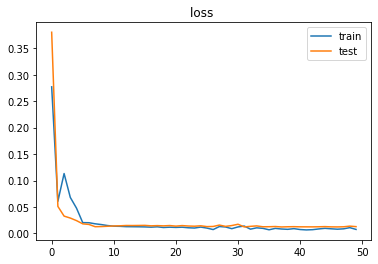

Test RMSE: 6.490


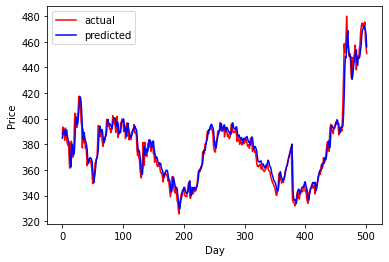

501
501


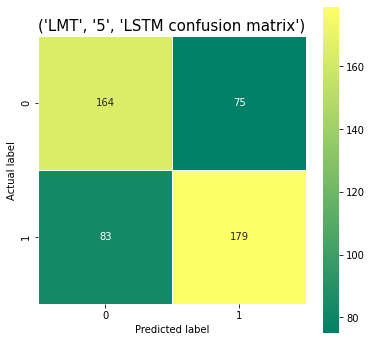

The accuracy of the model is: 68.46 %
The f1 value for the model is: 69.38 %
756
Epoch 1/50
42/42 - 1s - loss: 0.1496 - val_loss: 0.2309 - 1s/epoch - 28ms/step
Epoch 2/50
42/42 - 0s - loss: 0.1081 - val_loss: 0.0699 - 80ms/epoch - 2ms/step
Epoch 3/50
42/42 - 0s - loss: 0.0602 - val_loss: 0.0180 - 77ms/epoch - 2ms/step
Epoch 4/50
42/42 - 0s - loss: 0.0231 - val_loss: 0.0250 - 75ms/epoch - 2ms/step
Epoch 5/50
42/42 - 0s - loss: 0.0515 - val_loss: 0.0737 - 78ms/epoch - 2ms/step
Epoch 6/50
42/42 - 0s - loss: 0.0332 - val_loss: 0.0298 - 77ms/epoch - 2ms/step
Epoch 7/50
42/42 - 0s - loss: 0.0151 - val_loss: 0.0260 - 76ms/epoch - 2ms/step
Epoch 8/50
42/42 - 0s - loss: 0.0287 - val_loss: 0.0293 - 76ms/epoch - 2ms/step
Epoch 9/50
42/42 - 0s - loss: 0.0168 - val_loss: 0.0333 - 77ms/epoch - 2ms/step
Epoch 10/50
42/42 - 0s - loss: 0.0355 - val_loss: 0.0157 - 76ms/epoch - 2ms/step
Epoch 11/50
42/42 - 0s - loss: 0.0272 - val_loss: 0.0171 - 76ms/epoch - 2ms/step
Epoch 12/50
42/42 - 0s - loss: 0.0401 

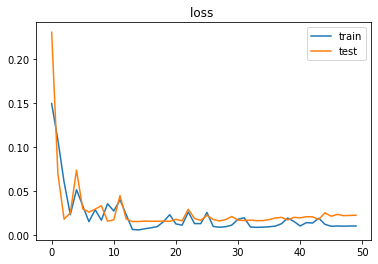

Test RMSE: 9.132


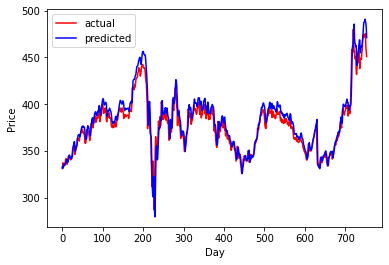

753
753


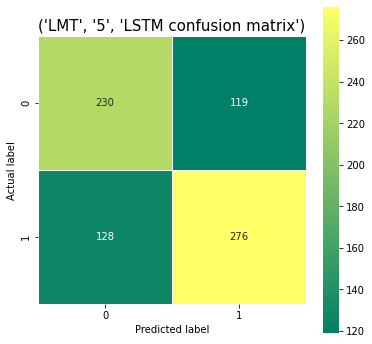

The accuracy of the model is: 67.20 %
The f1 value for the model is: 69.09 %
1007
Epoch 1/50
56/56 - 1s - loss: 0.0679 - val_loss: 0.0550 - 1s/epoch - 21ms/step
Epoch 2/50
56/56 - 0s - loss: 0.0861 - val_loss: 0.0457 - 96ms/epoch - 2ms/step
Epoch 3/50
56/56 - 0s - loss: 0.0183 - val_loss: 0.0276 - 95ms/epoch - 2ms/step
Epoch 4/50
56/56 - 0s - loss: 0.0167 - val_loss: 0.0150 - 95ms/epoch - 2ms/step
Epoch 5/50
56/56 - 0s - loss: 0.0106 - val_loss: 0.0167 - 94ms/epoch - 2ms/step
Epoch 6/50
56/56 - 0s - loss: 0.0141 - val_loss: 0.0291 - 95ms/epoch - 2ms/step
Epoch 7/50
56/56 - 0s - loss: 0.0162 - val_loss: 0.0199 - 95ms/epoch - 2ms/step
Epoch 8/50
56/56 - 0s - loss: 0.0121 - val_loss: 0.0153 - 95ms/epoch - 2ms/step
Epoch 9/50
56/56 - 0s - loss: 0.0079 - val_loss: 0.0155 - 95ms/epoch - 2ms/step
Epoch 10/50
56/56 - 0s - loss: 0.0119 - val_loss: 0.0176 - 95ms/epoch - 2ms/step
Epoch 11/50
56/56 - 0s - loss: 0.0149 - val_loss: 0.0277 - 95ms/epoch - 2ms/step
Epoch 12/50
56/56 - 0s - loss: 0.0133

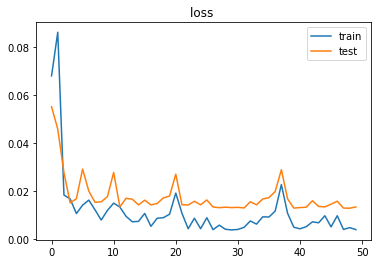

Test RMSE: 6.591


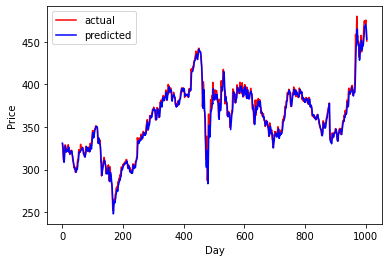

1004
1004


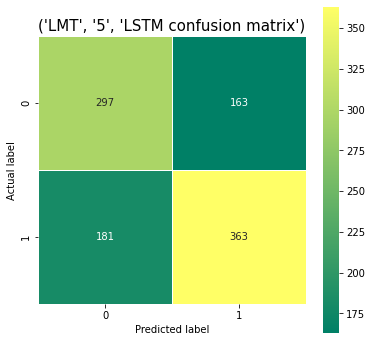

The accuracy of the model is: 65.74 %
The f1 value for the model is: 67.85 %
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
BTC-USD
365
Epoch 1/50
21/21 - 1s - loss: 0.0938 - val_loss: 0.4278 - 1s/epoch - 52ms/step
Epoch 2/50
21/21 - 0s - loss: 0.0691 - val_loss: 0.3552 - 51ms/epoch - 2ms/step
Epoch 3/50
21/21 - 0s - loss: 0.0559 - val_loss: 0.2914 - 48ms/epoch - 2ms/step
Epoch 4/50
21/21 - 0s - loss: 0.0429 - val_loss: 0.1988 - 46ms/epoch - 2ms/step
Epoch 5/50
21/21 - 0s - loss: 0.0315 - val_loss: 0.1023 - 46ms/epoch - 2ms/step
Epoch 6/50
21/21 - 0s - loss: 0.0162 - val_loss: 0.0260 - 45ms/epoch - 2ms/step
Epoch 7/50
21/21 - 0s - loss: 0.0119 - val_loss: 0.0339 - 46ms/epoch - 2ms/step
Epoch 8/50
21/21 - 0s - loss: 0.0144 - val_loss: 0.0229 - 45ms/epoch - 2ms/s

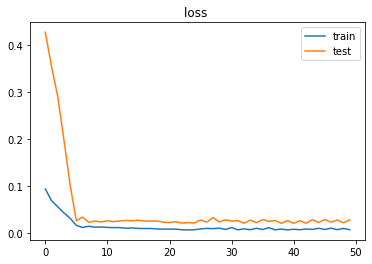

Test RMSE: 2149.612


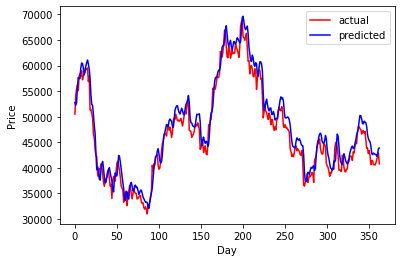

362
362


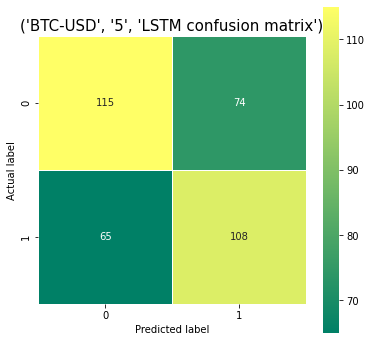

The accuracy of the model is: 61.60 %
The f1 value for the model is: 60.85 %
555
Epoch 1/50
31/31 - 2s - loss: 0.1650 - val_loss: 1.5669 - 2s/epoch - 56ms/step
Epoch 2/50
31/31 - 0s - loss: 0.1020 - val_loss: 0.7328 - 67ms/epoch - 2ms/step
Epoch 3/50
31/31 - 0s - loss: 0.0659 - val_loss: 0.1673 - 62ms/epoch - 2ms/step
Epoch 4/50
31/31 - 0s - loss: 0.0314 - val_loss: 0.1257 - 62ms/epoch - 2ms/step
Epoch 5/50
31/31 - 0s - loss: 0.0119 - val_loss: 0.0869 - 62ms/epoch - 2ms/step
Epoch 6/50
31/31 - 0s - loss: 0.0186 - val_loss: 0.0944 - 62ms/epoch - 2ms/step
Epoch 7/50
31/31 - 0s - loss: 0.0274 - val_loss: 0.0903 - 61ms/epoch - 2ms/step
Epoch 8/50
31/31 - 0s - loss: 0.0287 - val_loss: 0.0913 - 62ms/epoch - 2ms/step
Epoch 9/50
31/31 - 0s - loss: 0.0146 - val_loss: 0.1568 - 62ms/epoch - 2ms/step
Epoch 10/50
31/31 - 0s - loss: 0.0209 - val_loss: 0.1398 - 62ms/epoch - 2ms/step
Epoch 11/50
31/31 - 0s - loss: 0.0250 - val_loss: 0.1310 - 62ms/epoch - 2ms/step
Epoch 12/50
31/31 - 0s - loss: 0.0204 

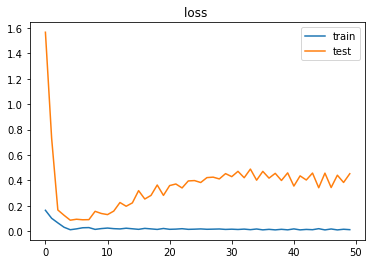

Test RMSE: 10423.146


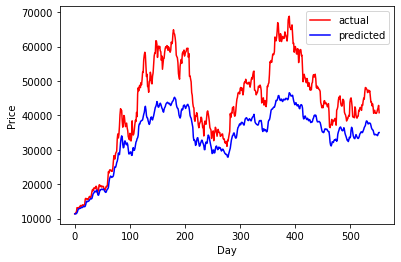

552
552


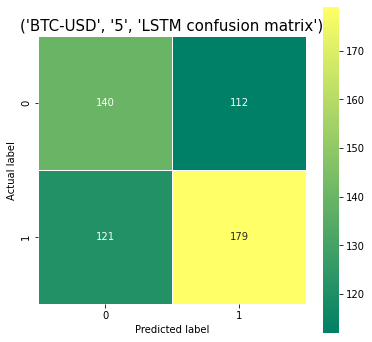

The accuracy of the model is: 57.79 %
The f1 value for the model is: 60.58 %
555
Epoch 1/50
31/31 - 1s - loss: 0.1905 - val_loss: 1.7572 - 1s/epoch - 37ms/step
Epoch 2/50
31/31 - 0s - loss: 0.1272 - val_loss: 0.9947 - 65ms/epoch - 2ms/step
Epoch 3/50
31/31 - 0s - loss: 0.0703 - val_loss: 0.2257 - 62ms/epoch - 2ms/step
Epoch 4/50
31/31 - 0s - loss: 0.0446 - val_loss: 0.0899 - 61ms/epoch - 2ms/step
Epoch 5/50
31/31 - 0s - loss: 0.0227 - val_loss: 0.0903 - 62ms/epoch - 2ms/step
Epoch 6/50
31/31 - 0s - loss: 0.0319 - val_loss: 0.0997 - 61ms/epoch - 2ms/step
Epoch 7/50
31/31 - 0s - loss: 0.0268 - val_loss: 0.1099 - 60ms/epoch - 2ms/step
Epoch 8/50
31/31 - 0s - loss: 0.0145 - val_loss: 0.1671 - 60ms/epoch - 2ms/step
Epoch 9/50
31/31 - 0s - loss: 0.0283 - val_loss: 0.1057 - 60ms/epoch - 2ms/step
Epoch 10/50
31/31 - 0s - loss: 0.0201 - val_loss: 0.1261 - 60ms/epoch - 2ms/step
Epoch 11/50
31/31 - 0s - loss: 0.0187 - val_loss: 0.1982 - 60ms/epoch - 2ms/step
Epoch 12/50
31/31 - 0s - loss: 0.0281 

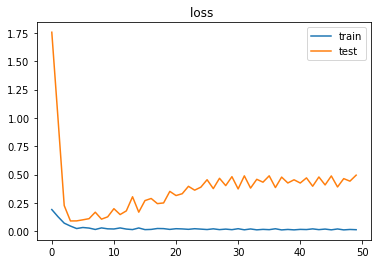

Test RMSE: 11377.437


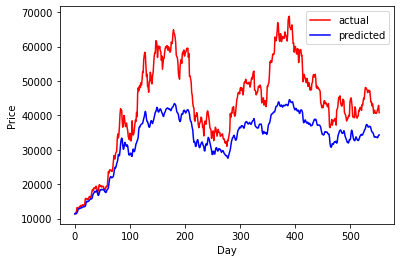

552
552


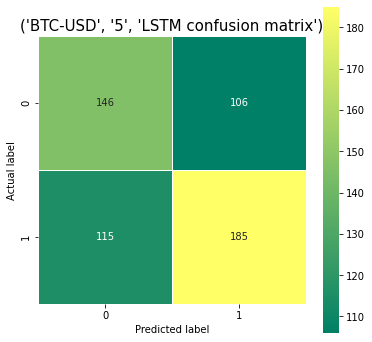

The accuracy of the model is: 59.96 %
The f1 value for the model is: 62.61 %
555
Epoch 1/50
31/31 - 1s - loss: 0.1412 - val_loss: 1.1981 - 1s/epoch - 36ms/step
Epoch 2/50
31/31 - 0s - loss: 0.0787 - val_loss: 0.2859 - 64ms/epoch - 2ms/step
Epoch 3/50
31/31 - 0s - loss: 0.0711 - val_loss: 0.1121 - 61ms/epoch - 2ms/step
Epoch 4/50
31/31 - 0s - loss: 0.0239 - val_loss: 0.2302 - 61ms/epoch - 2ms/step
Epoch 5/50
31/31 - 0s - loss: 0.0132 - val_loss: 0.0773 - 60ms/epoch - 2ms/step
Epoch 6/50
31/31 - 0s - loss: 0.0266 - val_loss: 0.1053 - 61ms/epoch - 2ms/step
Epoch 7/50
31/31 - 0s - loss: 0.0243 - val_loss: 0.1072 - 60ms/epoch - 2ms/step
Epoch 8/50
31/31 - 0s - loss: 0.0185 - val_loss: 0.0847 - 59ms/epoch - 2ms/step
Epoch 9/50
31/31 - 0s - loss: 0.0220 - val_loss: 0.0936 - 60ms/epoch - 2ms/step
Epoch 10/50
31/31 - 0s - loss: 0.0246 - val_loss: 0.0927 - 60ms/epoch - 2ms/step
Epoch 11/50
31/31 - 0s - loss: 0.0179 - val_loss: 0.1169 - 60ms/epoch - 2ms/step
Epoch 12/50
31/31 - 0s - loss: 0.0179 

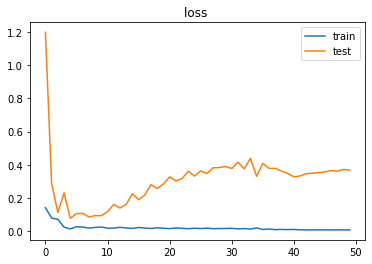

Test RMSE: 8746.090


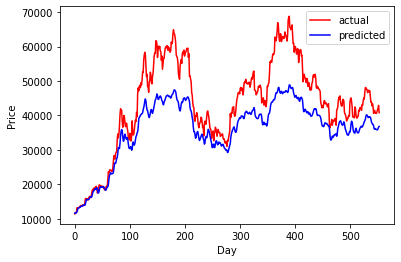

552
552


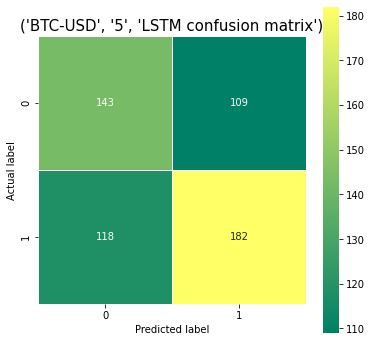

The accuracy of the model is: 58.88 %
The f1 value for the model is: 61.59 %


In [66]:
Tickers = ["MSFT","BP","DIS","LMT","BTC-USD"]
for tick in Tickers:
    stock5 = yf.download([tick],period = "5y")
    stock10 = yf.download([tick],period = "10y")
    stock15 = yf.download([tick],period = "15y")
    stock20 = yf.download([tick],period = "20y")
    
    years = [stock5,stock10,stock15,stock20]
    print(tick)
    for stock in years:
        yearsused = 5
        ratio = round(0.8*stock.shape[0])
        values = stock.iloc[:, 1:3].values
        train = values[:ratio]
        test = values[ratio:]
        print(len(test))
        # normalize features
        scaler = MinMaxScaler(feature_range=(0, 1))
        train_scaled = scaler.fit_transform(train)

        lags = 2
        features = train_scaled.shape[1]
        #print(lags, features)

        # frame as supervised learning
        train_reframed = series_to_supervised(train_scaled, lags, 1)
        #print(train_reframed)
        # drop columns we don't want to predict
        train_reframed.drop(train_reframed.columns[[-1]], axis=1, inplace=True)

        test_scaled = scaler.transform(test)
        test_reframed = series_to_supervised(test_scaled, lags, 1)
        test_reframed.drop(test_reframed.columns[[-1]], axis=1, inplace=True)

#         print(train_reframed.head())
#         print(test_reframed.head())
        
        values_train = train_reframed.values
        values_test = test_reframed.values

        train_X, train_y = values_train[:, :-1], values_train[:, -1]
        test_X, test_y = values_test[:, :-1], values_test[:, -1]
        #print(train_X.shape, test_X.shape)
        # reshape input to be 3D [samples, timesteps, features]
        train_X = train_X.reshape((train_X.shape[0], 2, features))
        test_X = test_X.reshape((test_X.shape[0], 2, features))
        #train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
        #test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
        #print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)
        

        model = Sequential()
        model.add(LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2])))
        model.add(Dense(1))
        model.compile(loss="mae",optimizer = "adam")
        lstm = model.fit(train_X, train_y, epochs=50, batch_size=72, validation_data=(test_X, test_y), verbose=2, shuffle=False)
        plt.plot(lstm.history['loss'], label='train')
        plt.plot(lstm.history['val_loss'], label='test')
        plt.title('loss ')
        plt.legend()
        plt.show()
        yhat = model.predict(test_X)

        # invert scaling for forecast
        inv_yhat = concatenate((yhat, yhat), axis=1)
        #inv_yhat = concatenate((yhat, test_X[:, 1:]), axis=1)

        inv_yhat = scaler.inverse_transform(inv_yhat)
        inv_yhat = inv_yhat[:,0]
        # invert scaling for actual
        test_y = test_y.reshape((len(test_y), 1))
        inv_y = concatenate((test_y, test_y), axis=1)
        inv_y = scaler.inverse_transform(inv_y)
        inv_y = inv_y[:,0]
        # calculate RMSE
        rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
        print('Test RMSE: %.3f' % rmse)
                
        plt.plot(inv_y, color = 'red', label = 'actual')
        plt.plot(inv_yhat, color = 'blue', label = 'predicted')
        plt.xlabel('Day')
        plt.ylabel('Price')
        plt.legend()
        plt.show()
        
        changing = stock[ratio:]
        Open = changing["Open"]
        CHANGE = np.array([])

        for i in range(0,len(Open)-1):    
            if Open[i]<Open[i+1]:
                CHANGE = np.append(CHANGE, 1)
            else:
                CHANGE = np.append(CHANGE, 0)
        CHANGE = CHANGE[:-2]
        
        
        predchange = np.array([])
        for i in range(0,len(inv_yhat)-1):    
            if inv_yhat[i]<inv_yhat[i+1]:
                predchange = np.append(predchange, 1)
            else:
                predchange = np.append(predchange, 0)    
        
        print(len(predchange))
        print(len(CHANGE))
        
        
        cm_lstm = metrics.confusion_matrix(predchange,CHANGE)
        plt.figure(figsize=(6,6))
        sns.heatmap(cm_lstm,annot=True,fmt="d",linewidths=.5,square=True,cmap="summer")
        plt.ylabel("Actual label")
        plt.xlabel("Predicted label")
        all_sample_title=(tick,str(yearsused),"LSTM confusion matrix")
        plt.title(all_sample_title,size=15)
        plt.show()
        
        yearsused = yearsused + 5
        
        print('The accuracy of the model is: {:.2f}'.format(accuracy_score(CHANGE, predchange)*100),"%")
        print('The f1 value for the model is: {:.2f}'.format(f1_score(CHANGE,predchange,pos_label=1.0)*100),'%')